# **Advanced Methods of Machine Learning**


#  Carlos Álvarez

### **Git-hub: https://github.com/Alvarez527**
### **Linkedin: www.linkedin.com/in/cralvarez-ai**


#### Professor: Pepe Cantoral Ph.D.

## **Deep Learning - Fully Connected Deep Neural Networks**
#### Activity 2b: Building a CNN for CIFAR10 Dataset with PyTorch

Created On: Feb 7, 2025 | Last Updated: Feb 9, 2025

# **Instructions of the Activity**

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 5 or 6 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

# **Environment Setup**

With the next imports we are preparing the environment to work with PyTorch, loading data, defining models, training them with different optimizers and visualizing the training progress.

In [18]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T

import torch.optim as optim
from tqdm import tqdm
import time

import matplotlib.pyplot as plt
# #only if you have jupyterthemes
# from jupyterthemes import jtplot
# jtplot.style()

# **Download Cifar10 dataset**

In [19]:
torch.cuda.is_available()

True

Now we need to load and preprocess the CIFAR-10 dataset, splitting it into training, validation and test sets, and create DataLoaders to access the data in minibatches during training. Transformations are applied to convert the images to tensors and normalize them.

In [20]:
DATA_PATH = '/data'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [21]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [22]:
train_loader.batch_size

64

In [23]:
#for i, (x, y) in enumerate(train_loader):
#     print(x, y)

# **Using  GPUs**

In [24]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)


cuda


# **Show images**

This code selects a random image from the CIFAR-10 test dataset, normalizes it, and displays it along with its class label. It serves to visualize an individual example from the dataset and to verify the normalization process.

La imagen muestreada representa un: frog


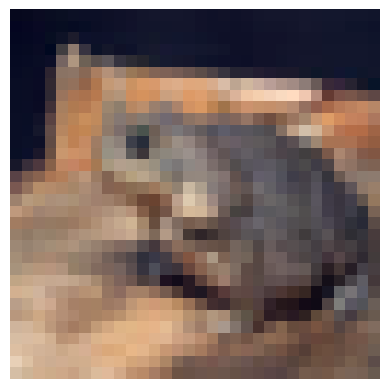

In [25]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


Next, we will use the following code to display a grid of example images from the CIFAR-10 dataset, showing several random samples for each of the 10 classes. This helps to understand the content of the dataset and to verify that it has been loaded correctly.

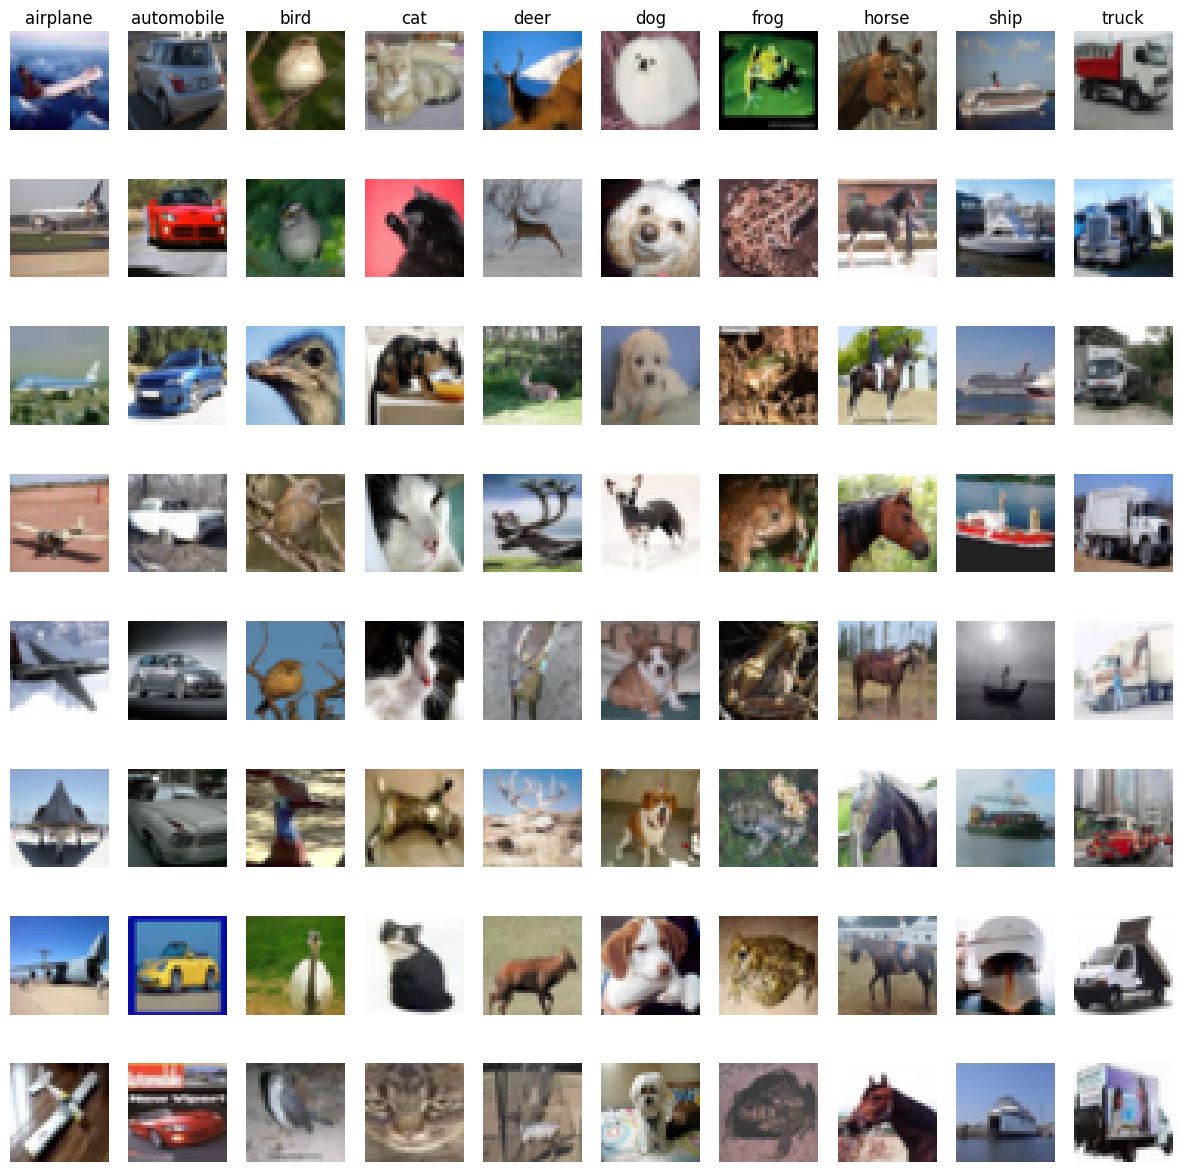

In [26]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

# **Calculate accuracy**


With this accuracy function we are going to calculate the accuracy of a given CNN model on a dataset provided by a DataLoader. We evaluate the model in inference mode, make predictions in minibatches and calculate the percentage of correct predictions.

In [27]:
def accuracy(model, loader):
    """
    Calculate the accuracy.

    Args:
        model (torch.nn.Module): The CNN model to evaluate.
        loader (torch.utils.data.DataLoader): The loader data for evaluation.

    Returns:
        float: Accuracy as a percentage.
    """
    model.eval() # We use  eval to set the model to inference, disabling droupout, and switching batch normalization to batch statistics.
    correct = 0
    total = 0

    with torch.no_grad(): # We also stop gradient computation to save memory and speed up evaluation.
        for images, labels in loader: # We don't calculate the gradient, we generate the minibatches.
            images, labels = images.to(device), labels.to(device)  # Use the global device
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy


# **Training Loop**

This train class aims to train a classification model in PyTorch in a robust and efficient way, providing a complete traceback of the process. To do so, it iterates through epochs and minibatches, calculates the loss using cross entropy, performs backpropagation, and updates the model parameters with a given optimizer. Furthermore, it evaluates the model on a validation set at the end of each epoch, saving the weights of the model that obtains the lowest validation loss to prevent overfitting. The function also includes a progress bar to monitor the training, printing relevant metrics such as training and validation loss, validation accuracy, and total training time.

In [28]:
def train(model, train_loader, val_loader, optimiser, scheduler, epochs=100):
    """
    Train a PyTorch model on a given dataset.

    Args:
        model (torch.nn.Module): The CNN model to train.
        train_loader (torch.utils.data.DataLoader): DataLoader for training data.
        val_loader (torch.utils.data.DataLoader): DataLoader for validation data.
        optimizer (torch.optim.Optimizer): Optimiser for updating model parameters.
        device (str): Device to run the training on ('cpu' or 'cuda'). Default is 'cpu'.
        epochs (int): Number of training epochs. Default is 100.

    Returns:
        None

    Notes:
        We set criterion (Cross-entropy) for this train function as a fixed parameter inside the function as is designed to model a classification task for this activity.
    """
    model.to(device)  # We ask the model to perform with the chosen device.
    model.train()  # Here we set the model to training mode
    criterion = nn.CrossEntropyLoss()
    start_time = time.time()  # We set an start time to track the training time

    #This variables store the best validation loss and its best weights to be recalled when the model ends training and prevent overfitting.
    best_val_loss = float('inf')
    best_model_weights = model.state_dict()

    #And here
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        running_loss = 0.0
        batch_time = time.time()  # This variable help us track the time for each batch
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch}/{epochs}", unit="batch")

        for images, labels in progress_bar:# We added a tqdm progress bar for the current epoch
            images, labels = images.to(device), labels.to(device)

            optimiser.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()  # This call compute the gradients for the model
            optimiser.step()  # Then we update the model parameters

            running_loss += loss.item()
            # Update the progress bar with the current loss and ETA
            progress_bar.set_postfix(loss=loss.item(),
                                     eta=int((time.time() - batch_time) * (len(train_loader) - progress_bar.n)))
            batch_time = time.time()  # Reset batch time for next iteration

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss) #Appends the train loss to a list for plotting

        # We set the model to evaluate validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for val_images, val_labels in val_loader:
                val_images, val_labels = val_images.to(device), val_labels.to(device)
                val_outputs = model(val_images)
                val_loss += criterion(val_outputs, val_labels).item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss) # Appends val_loss to a list for plotting
        val_acc = accuracy(model, val_loader)

        scheduler.step()

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_weights = model.state_dict()  # Save the best model weights if they are better.

    model.load_state_dict(best_model_weights) # Here we load the best weights stored in training to be used in the model.
    end_time = time.time()
    total_time = end_time - start_time
    print(f"Training time: {total_time:.2f} seconds")


    print("Training complete!")

    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


# **Linear model**

### **Description of the Linear Neural Network Model**

This section describes a basic implementation of a fully connected neural network (FCNN) in PyTorch. Neural networks are systems inspired by the structure of the human brain and are composed of a chain of neurons organized in layers. These layers are fully connected to each other, allowing the transmission and transformation of information from input to output.

NNs are composed of a chain of connected neurons usually organized in ***n*** layers.  These layers are fully connected with the next and previous layers, and no connections exist between neurons of the same layer *(Scabini & Bruno, 2023, p. 1)*.

One of the basic principles of conventional neural networks is to cascade non-linear aggregation functions that are supposed to mimic the functioning of natural neurons, hence their name “artificial neurons”. the conventional neuron is the succession of a weighted addition performing a balance and a non-linearity performing a choice *(Strauss et al., 2025, pp. 1-2)*.

### Model Architecture

The `LinearModel` consists of the following main layers:

1. **Flatten Layer (`Flatten`)**: This layer transforms the three-dimensional image inputs (with dimensions 3x32x32) into a one-dimensional vector to be processed by the subsequent linear layers.

2. **First Linear Layer (`Linear`)**: Takes the flattened vector as input and transforms it into a 256-dimensional representation. A ReLU activation function is applied to introduce non-linearity.

3. **Second Linear Layer (`Linear`)**: Receives the output of the first layer and converts it into another 256-dimensional representation, also followed by a ReLU activation.

4. **Output Layer (`Linear`)**: Reduces the dimensionality to 10, corresponding to the number of possible classes in the problem.

### Functioning

The `LinearModel` implements the `forward` method, which defines the forward pass in the network. Information flows from the input layer to the output layer, passing through the intermediate layers and activation functions.

### Optimization

The Adam optimizer is used to adjust the weights and biases of the model, with a learning rate defined as `lr = 0.001`. This allows for efficient training by updating the model's parameters based on the gradient of the loss function.

Let’s define a simple linear model in PyTorch and instantiate the model on the specified device. The model takes flattened images as input and performs multiclass classification. Adam optimizer is used to train the model.

In [29]:
class LinearModel(nn.Module):
    def __init__(self, input_size=32*32*3, hidden1=256, hidden2=256, num_classes=10):
        super(LinearModel, self).__init__()
        # Definition of Layers
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(input_size, hidden1)
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden1, hidden2)
        self.activation2 = nn.ReLU()
        self.output_layer = nn.Linear(hidden2, num_classes)

    def forward(self, x):
        x = self.flatten(x)  # Flatten
        x = self.activation1(self.layer1(x))  # First layer with ReLU
        x = self.activation2(self.layer2(x))  # Second layer with ReLU
        x = self.output_layer(x)  # Output layer
        return x

# Parametes
input_size = 32 * 32 * 3
hidden1 = 256
hidden2 = 256
num_classes = 10
lr = 0.001

# Instantiate the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = LinearModel(input_size, hidden1, hidden2, num_classes).to(device)

# Instantiate the optimizar
optimiser = optim.Adam(model1.parameters(), lr=lr)

Epoch 0/5: 100%|██████████| 782/782 [00:15<00:00, 50.58batch/s, eta=0, loss=1.38]


Epoch [1/5], Train Loss: 1.6403, Val Loss: 1.4901, Val Accuracy: 48.38%


Epoch 1/5: 100%|██████████| 782/782 [00:15<00:00, 51.32batch/s, eta=0, loss=1.56]


Epoch [2/5], Train Loss: 1.4195, Val Loss: 1.3986, Val Accuracy: 51.64%


Epoch 2/5: 100%|██████████| 782/782 [00:15<00:00, 50.18batch/s, eta=0, loss=1.3]


Epoch [3/5], Train Loss: 1.3002, Val Loss: 1.3462, Val Accuracy: 52.44%


Epoch 3/5: 100%|██████████| 782/782 [00:15<00:00, 50.31batch/s, eta=0, loss=1.05]


Epoch [4/5], Train Loss: 1.2086, Val Loss: 1.3379, Val Accuracy: 52.46%


Epoch 4/5: 100%|██████████| 782/782 [00:14<00:00, 52.82batch/s, eta=0, loss=0.73]


Epoch [5/5], Train Loss: 1.1231, Val Loss: 1.3307, Val Accuracy: 54.18%
Training time: 88.24 seconds
Training complete!


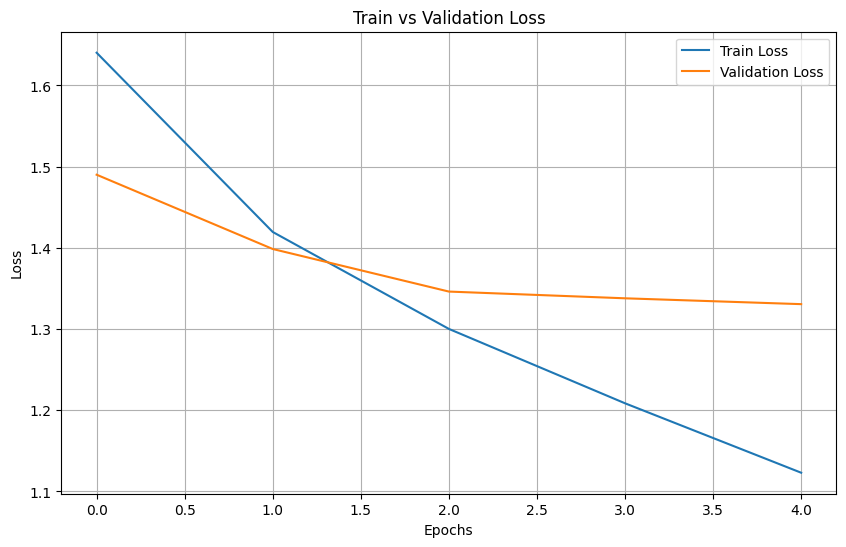

In [30]:
#train(model1, train_loader, val_loader, optimiser, 5)
steps_per_epoch = len(train_loader)
scheduler = optim.lr_scheduler.OneCycleLR(optimiser, max_lr=0.01, epochs=10, steps_per_epoch=steps_per_epoch)

train(model1, train_loader, val_loader, optimiser, scheduler, epochs=5)

In [31]:
test_accuracy = accuracy(model1, test_loader)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 52.20%


### **Conclusion**

* The model is learning very slowly, or it might not even be learning at all.
* The validation accuracy is very low (around 40-50%), barely better than chance (10% for CIFAR-10 with 10 classes).
* The training and validation loss are similar, which is good, but both are high, indicating that the model is not fitting the data well.
* The simple linear model we are using (LinearModel) is probably too simple for the complexity of the CIFAR-10 dataset. We need a more complex model, such as a convolutional neural network (CNN), to get better performance.

# **Sequential CNN**

### **Description of the Convolutional Neural Network (CNN) Model**

This section describes an advanced implementation of a Convolutional Neural Network (CNN) using PyTorch for the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 color images divided into 10 classes, making it a benchmark for image classification tasks.

Some geographical or image data have spatial structures that FNNs may not efficiently model. An alternative, a convolutional neural network (CNN), is known to be a superior image analysis tool. CNNs stem from and more capably explore localized spatial structures. In addition to having convolutional layers, a CNN may also have fully connected and/or pooling layers, depending on needs.

Convolutional layers apply a discrete convolution to the input image (regarded as matrix data) with a set of trained filters. The output of each filter is a “convolved image" that contains the Hadamard product of the input image and filter for each compatible submatrix.

Let \( K \) be the image’s kernel function and \( I \) the image to be convolved, both bivariate. The discrete convolution operation \(*\) obeys:
$$
K(x, y) * I(x, y) = \sum_{i=1}^{\infty} \sum_{j=1}^{\infty} K(i, j) I(x - i, y - j)
$$

The summation is usually truncated in practice: the indices \( x - i \) and \( y - j \) should be in the observation ranges.

There are many different convolutions that illuminate certain patterns or features in an image, including edges, corners, or textures. In the context of neural networks, these convolutions can be learned or estimated as part of the model fitting procedure, allowing the data to determine the important features for predicting a response. Outputs from convolutional layers can be vectorized and combined with a fully-connected layer to increase model flexibility, often improving standard feedforward neural network predictions (Wang et al., 2025).

### **Model Architecture**

The model is composed of the following key components:

1. **Convolutional Layers (`Conv2d`)**: These layers apply learnable filters to the input image, extracting spatial features. The first convolutional layer takes a 3-channel input and outputs 32 feature maps. The second, third, and fourth layers progressively increase the number of feature maps to 64 and 128.

2. **Batch Normalization (`BatchNorm2d`)**: Applied after convolutional layers to normalize the feature maps, accelerating training and improving stability.

3. **Activation Functions (`ReLU`)**: Introduce non-linearity, allowing the network to model complex relationships in the data.

4. **Dropout Layers (`Dropout`)**: Regularization layers that randomly deactivate a portion of neurons during training, preventing overfitting. The dropout rates are set at 0.25 for convolutional layers and 0.5 for the fully connected layers.

5. **Pooling Layers (`MaxPool2d`)**: Reduce the spatial dimensions of the feature maps, retaining essential information while reducing computational complexity.

6. **Flatten Layer (`Flatten`)**: Transforms the multi-dimensional feature maps into a one-dimensional vector suitable for fully connected layers.

7. **Fully Connected Layers (`Linear`)**: Perform the final mapping from the feature space to class scores. The first fully connected layer outputs 1024 neurons, followed by a ReLU activation and dropout. The final layer outputs 10 neurons corresponding to class probabilities.

### **Functioning**

The forward pass begins with the input image passing through a series of convolutional, batch normalization, activation, and pooling layers. The resulting feature maps are flattened and fed into fully connected layers, culminating in class scores.

### **Optimization and Learning Rate Scheduling**

- **Optimizer (`Adam`)**: The Adam optimizer is employed with a learning rate of 0.001 and a weight decay of 1e-4 to update the model parameters efficiently.
- **Learning Rate Scheduler (`OneCycleLR`)**: This scheduler dynamically adjusts the learning rate during training, peaking at 0.01, to enhance convergence.

### **Training Process**

The model is trained for 10 epochs using a custom training function on the CIFAR-10 dataset. The OneCycleLR scheduler ensures a balanced learning rate schedule throughout the training process.

We are going to write a code to initialize and train a Convolutional Neural Network (CNN) using PyTorch for image classification on the CIFAR-10 dataset and we will use 10 outputs in the final linear layer.

Epoch 0/10: 100%|██████████| 782/782 [00:23<00:00, 32.63batch/s, eta=0, loss=1.45]


Epoch [1/10], Train Loss: 1.6189, Val Loss: 1.2055, Val Accuracy: 57.58%


Epoch 1/10: 100%|██████████| 782/782 [00:23<00:00, 33.52batch/s, eta=0, loss=1.08]


Epoch [2/10], Train Loss: 1.0065, Val Loss: 0.8562, Val Accuracy: 69.48%


Epoch 2/10: 100%|██████████| 782/782 [00:23<00:00, 33.30batch/s, eta=0, loss=0.434]


Epoch [3/10], Train Loss: 0.7721, Val Loss: 0.7807, Val Accuracy: 73.20%


Epoch 3/10: 100%|██████████| 782/782 [00:23<00:00, 33.37batch/s, eta=0, loss=0.185]


Epoch [4/10], Train Loss: 0.6006, Val Loss: 0.6809, Val Accuracy: 77.10%


Epoch 4/10: 100%|██████████| 782/782 [00:23<00:00, 33.19batch/s, eta=0, loss=0.436]


Epoch [5/10], Train Loss: 0.4558, Val Loss: 0.6869, Val Accuracy: 77.34%


Epoch 5/10: 100%|██████████| 782/782 [00:24<00:00, 31.79batch/s, eta=0, loss=0.2]


Epoch [6/10], Train Loss: 0.3221, Val Loss: 0.7191, Val Accuracy: 78.36%


Epoch 6/10: 100%|██████████| 782/782 [00:23<00:00, 33.32batch/s, eta=0, loss=0.141]


Epoch [7/10], Train Loss: 0.2119, Val Loss: 0.8297, Val Accuracy: 77.68%


Epoch 7/10: 100%|██████████| 782/782 [00:23<00:00, 33.09batch/s, eta=0, loss=0.271]


Epoch [8/10], Train Loss: 0.1356, Val Loss: 0.9225, Val Accuracy: 77.94%


Epoch 8/10: 100%|██████████| 782/782 [00:23<00:00, 33.88batch/s, eta=0, loss=0.187]


Epoch [9/10], Train Loss: 0.0994, Val Loss: 1.0024, Val Accuracy: 78.36%


Epoch 9/10: 100%|██████████| 782/782 [00:23<00:00, 33.27batch/s, eta=0, loss=0.385]


Epoch [10/10], Train Loss: 0.0774, Val Loss: 1.0700, Val Accuracy: 78.74%
Training time: 262.50 seconds
Training complete!


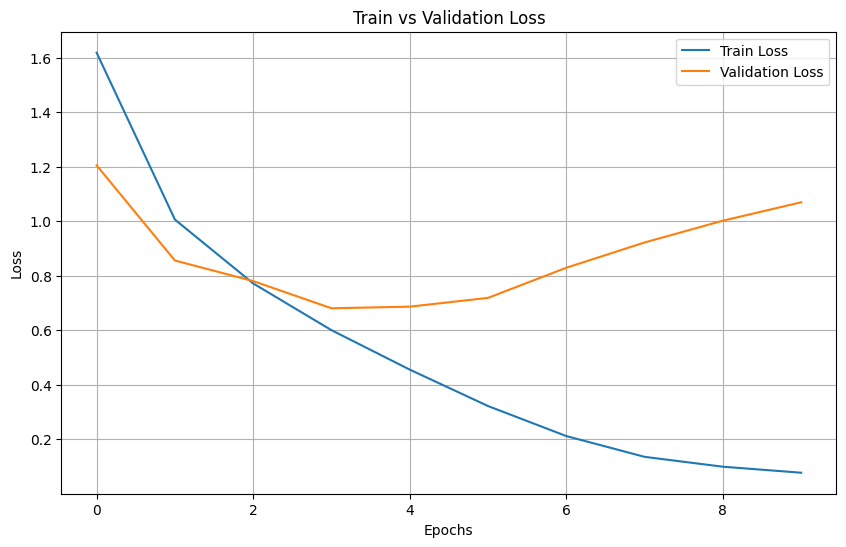

In [32]:
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Dropout(0.25),
    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.Dropout(0.25),  # Increased dropout
    nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Flatten(),
    nn.Linear(128 * 8 * 8, 1024), # Added a fully connected layer
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 10)
)

# Initialize the model
modelCNN1 = model.to(device)
optimiser = optim.Adam(modelCNN1.parameters(), lr=0.001, weight_decay=1e-4)

steps_per_epoch = len(train_loader)
scheduler = optim.lr_scheduler.OneCycleLR(optimiser, max_lr=0.01, epochs=10, steps_per_epoch=steps_per_epoch)  # We use OneCycleLR like A2a

train(modelCNN1, train_loader, val_loader, optimiser, scheduler, epochs=10)

In [33]:
test_accuracy = accuracy(modelCNN1, test_loader)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 77.62%


## **Conclusion**
  - The linear model is learning slowly and shows limited improvement throughout training. The validation accuracy is low, peaking at just 53.74%, which is barely better than chance for this dataset.

  - The training and validation losses decrease over time, but both remain high, indicating that the model is not fitting the data well.

  - The simple linear model we are using is likely too basic to capture the complexity of the problem, as evidenced by its low performance. A more sophisticated model is needed to improve results.

  - In contrast, the CNN model significantly outperforms the linear model, achieving a validation accuracy of 78.74% and a test accuracy of 77.62%. The CNN shows faster convergence, with the loss decreasing quickly and the accuracy steadily increasing throughout training.

  - The CNN, while more computationally expensive (requiring 265.44 seconds of training time), is much more effective for this task, demonstrating that a convolutional neural network is a better fit for this type of problem.

## **Models Comparison**

In comparing the performance and efficiency of the two models, we see notable differences.

1. Linear Model:
  - Test Accuracy: 52.68%
  - Training Time: 98.58 seconds
  - Performance: The linear model shows steady improvement in training, with a gradual decrease in loss. However, the final test accuracy remains low compared to the CNN model. The validation accuracy peaks at 53.74% after 5 epochs.

2. CNN Model:
  - Test Accuracy: 77.62%
  - Training Time: 265.04 seconds
  - Performance: The CNN model outperforms the linear model with a significant boost in accuracy. It demonstrates faster convergence, improving from 54.18% to 78.74% validation accuracy in just 10 epochs. It also maintains high validation accuracy throughout training, peaking at 78.36%.

Efficiency: The linear model is significantly faster to train, requiring only 88.24 seconds, while the CNN model takes about 262.50 seconds for training.
Despite the higher training time of the CNN, the boost in accuracy justifies the trade-off in time.

Overall Comparison: The CNN model clearly outperforms the linear model in terms of both accuracy and generalization. Although the training time is longer, the improvements in accuracy make it a much more efficient model for the given task. The linear model, though quicker to train, fails to capture complex patterns, leading to lower performance.

## **References**

Scabini, L., & Bruno, O. (2023). Structure and performance of fully connected neural networks: Emerging complex network properties. *Physica A: Statistical Mechanics and its Applications*, *615*, 1-17. https://doi.org/10.1016/j.physa.2023.128585.

Strauss, O., Rico, A., Pasquet, J., & Pibre, L. (2025). Combining thresholded real values for designing an artificial neuron in a neural network. *Fuzzy Sets and Systems*, *449*, 1-15. https://doi.org/10.1016/j.fss.2024.109191.

Wang, Q., Parker, P. A., & Lund, R. (2025). Spatial deep convolutional neural networks. *Spatial Statistics*. Advance online publication. https://doi.org/10.1016/j.spasta.2025.100883